INSERT CURRENT DIRECTORY TO IMPORT OTHER FILES

In [1]:
import sys
sys.path.insert(0, "..")

LOAD THE IMAGE DIRECTORY, CONCEPT TAGS AND CLASS LABELS, (RUN ANY OF THE FOLLOWINF TWO CELLS)

In [2]:
# from source import data_processing, train_model

# dir ="../dataset/CUB_200_2011/"   #-----directory of the CUB dataset

# X_train, X_test, y_train, y_test = data_processing.extract_data_path_concept_and_label(dir)  #-----data_processing function is modified not to split the validation set for now
# print(f"Train data: {len(X_train)} and Test Data: {len(X_test)}")

## LOAD THE TRAINING DATA ##

In [1]:
import pickle
with open('../dataset/cub_pickles/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
f.close()

with open('../dataset/cub_pickles/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
f.close()


In [5]:
len(X_train)

9424

## MODEL : concept loss and target loss gets equal priority ##
MODEL NAME: model_1_1

In [4]:
from source import models, train_model
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
#device ='cpu'
model_1_1 = models.CBM(c_chanel=3, 
                   hidden_units=32, 
                   concepts=312, 
                   output_shape=200,
                   img_shape=32).to(device)

training_loss, concept_loss, target_loss = train_model.train_with_CUB(model=model_1_1,
                           epochs=100,
                           BATCH_SIZE=32,
                           X_train= X_train,
                           y_train= y_train,
                           device=device,
                           learning_rate=0.1,
                           consider_concept_loss=True,
                           consider_target_loss= True,
                           img_shape=32,
                           c_lambda=1.0)

c:\Users\DELL\anaconda3\envs\py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\ML_Projects\CBM\jupyter_notebooks\..\source\train_model.py:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  X_train = torch.tensor(X_list).to(device)


Epoch 1: Training loss  6.01034, concept loss:  0.70825, target loss:  5.30209

Epoch 2: Training loss  6.00007, concept loss:  0.69979, target loss:  5.30027

Epoch 3: Training loss  5.99478, concept loss:  0.69515, target loss:  5.29963

Epoch 4: Training loss  5.99282, concept loss:  0.69347, target loss:  5.29935

Epoch 5: Training loss  5.99235, concept loss:  0.69312, target loss:  5.29922

Epoch 6: Training loss  5.99210, concept loss:  0.69299, target loss:  5.29911

Epoch 7: Training loss  5.99191, concept loss:  0.69294, target loss:  5.29897

Epoch 8: Training loss  5.99183, concept loss:  0.69291, target loss:  5.29892

Epoch 9: Training loss  5.99177, concept loss:  0.69289, target loss:  5.29888

Epoch 10: Training loss  5.99173, concept loss:  0.69288, target loss:  5.29885

Epoch 11: Training loss  5.99167, concept loss:  0.69287, target loss:  5.29880

Epoch 12: Training loss  5.99160, concept loss:  0.69285, target loss:  5.29875

Epoch 13: Training loss  5.99162, con

------------    PLOT THE LOSS CURVES FOR MODEL_1_1   -------------

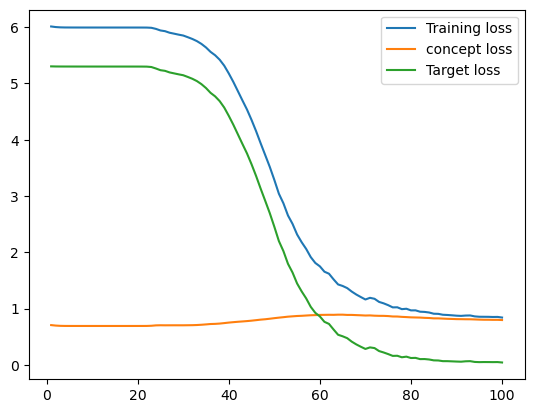

In [5]:
import numpy as np
import matplotlib.pyplot as plt
epochs_in_training = 100

training_loss = torch.tensor(training_loss, device="cpu")
concept_loss = torch.tensor(concept_loss, device="cpu")
target_loss = torch.tensor(target_loss, device="cpu")

training_loss = np.array(training_loss)
concept_loss = np.array(concept_loss)
target_loss = np.array(target_loss)

x_axis = np.arange(1,epochs_in_training+1,1)

plt.plot(x_axis, training_loss, label = "Training loss")
plt.plot(x_axis, concept_loss, label= "concept loss")
plt.plot(x_axis, target_loss, label="Target loss")
plt.legend()
plt.show()

--------- SAVE MODEL_1_1 AS PICKLE FILE ---------

In [6]:
import pickle
with open('../saved_models/model_1_1.pkl', 'wb') as f:
    pickle.dump(model_1_1, f)
f.close()

------ DELETE ALL VARIABLES (OTHER THAN DATASET) AND CLEAR GPU CACHE-----------

In [11]:
del model_1_1, concept_loss, training_loss, target_loss
torch.cuda.empty_cache()

## MODEL: COCEPT LOSS GETS 1.5 Times PRIORITY THAN TARGET LOSS ##
MODEL NAME: model_2_1

In [12]:
from source import models, train_model
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
#device ='cpu'
model_2_1 = models.CBM(c_chanel=3, 
                   hidden_units=32, 
                   concepts=312, 
                   output_shape=200,
                   img_shape=32).to(device)

training_loss, concept_loss, target_loss = train_model.train_with_CUB(model=model_2_1,
                           epochs=100,
                           BATCH_SIZE=32,
                           X_train= X_train,
                           y_train= y_train,
                           device=device,
                           learning_rate=0.1,
                           consider_concept_loss=True,
                           consider_target_loss= True,
                           img_shape=32,
                           c_lambda=1.5)

Epoch 1: Training loss  6.35687, concept loss:  0.70370, target loss:  5.30132

Epoch 2: Training loss  6.34272, concept loss:  0.69535, target loss:  5.29970

Epoch 3: Training loss  6.33909, concept loss:  0.69315, target loss:  5.29937

Epoch 4: Training loss  6.33860, concept loss:  0.69296, target loss:  5.29916

Epoch 5: Training loss  6.33836, concept loss:  0.69295, target loss:  5.29893

Epoch 6: Training loss  6.33818, concept loss:  0.69296, target loss:  5.29873

Epoch 7: Training loss  6.33791, concept loss:  0.69302, target loss:  5.29838

Epoch 8: Training loss  6.33743, concept loss:  0.69319, target loss:  5.29765

Epoch 9: Training loss  6.33603, concept loss:  0.69377, target loss:  5.29538

Epoch 10: Training loss  6.32237, concept loss:  0.69770, target loss:  5.27582

Epoch 11: Training loss  6.25654, concept loss:  0.70309, target loss:  5.20189

Epoch 12: Training loss  6.16032, concept loss:  0.71132, target loss:  5.09333

Epoch 13: Training loss  6.07751, con

------------    PLOT THE LOSS CURVES FOR MODEL_2_1   -------------

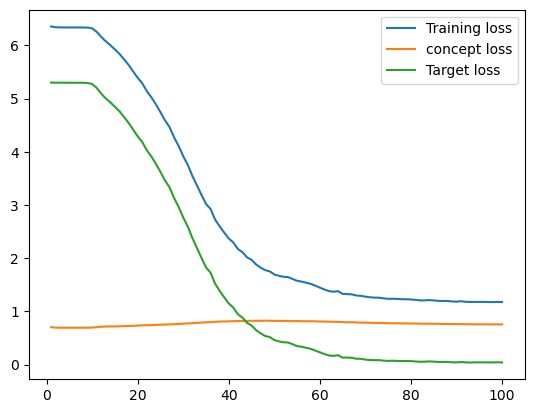

In [13]:
import numpy as np
import matplotlib.pyplot as plt
epochs_in_training = 100

training_loss = torch.tensor(training_loss, device="cpu")
concept_loss = torch.tensor(concept_loss, device="cpu")
target_loss = torch.tensor(target_loss, device="cpu")

training_loss = np.array(training_loss)
concept_loss = np.array(concept_loss)
target_loss = np.array(target_loss)

x_axis = np.arange(1,epochs_in_training+1,1)

plt.plot(x_axis, training_loss, label = "Training loss")
plt.plot(x_axis, concept_loss, label= "concept loss")
plt.plot(x_axis, target_loss, label="Target loss")
plt.legend()
plt.show()

----- SAVE MODEL_2_1 as PICKLE FILE --------

In [14]:
import pickle
with open('../saved_models/model_2_1.pkl', 'wb') as f:
    pickle.dump(model_2_1, f)
f.close()

------ DELETE ALL VARIABLES (OTHER THAN DATASET) AND CLEAR GPU CACHE-----------

In [ ]:
del model_2_1, concept_loss, training_loss, target_loss
torch.cuda.empty_cache()

## MODEL: COCEPT LOSS GETS 2.0 Times PRIORITY THAN TARGET LOSS ##
MODEL NAME: model_2_2

In [3]:
from source import models, train_model
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
#device ='cpu'
model_2_2 = models.CBM(c_chanel=3, 
                   hidden_units=32, 
                   concepts=312, 
                   output_shape=200,
                   img_shape=32).to(device)

training_loss, concept_loss, target_loss = train_model.train_with_CUB(model=model_2_2,
                           epochs=100,
                           BATCH_SIZE=32,
                           X_train= X_train,
                           y_train= y_train,
                           device=device,
                           learning_rate=0.1,
                           consider_concept_loss=True,
                           consider_target_loss= True,
                           img_shape=32,
                           c_lambda=2.0)

c:\Users\DELL\anaconda3\envs\py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\ML_Projects\CBM\jupyter_notebooks\..\source\train_model.py:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  X_train = torch.tensor(X_list).to(device)


Epoch 1: Training loss  6.70589, concept loss:  0.70246, target loss:  5.30096

Epoch 2: Training loss  6.68801, concept loss:  0.69429, target loss:  5.29943

Epoch 3: Training loss  6.68571, concept loss:  0.69328, target loss:  5.29915

Epoch 4: Training loss  6.68534, concept loss:  0.69328, target loss:  5.29878

Epoch 5: Training loss  6.68488, concept loss:  0.69338, target loss:  5.29812

Epoch 6: Training loss  6.68382, concept loss:  0.69370, target loss:  5.29642

Epoch 7: Training loss  6.66851, concept loss:  0.69713, target loss:  5.27426

Epoch 8: Training loss  6.57007, concept loss:  0.70633, target loss:  5.15741

Epoch 9: Training loss  6.53094, concept loss:  0.70532, target loss:  5.12029

Epoch 10: Training loss  6.49830, concept loss:  0.70638, target loss:  5.08554

Epoch 11: Training loss  6.44621, concept loss:  0.71174, target loss:  5.02273

Epoch 12: Training loss  6.38358, concept loss:  0.71369, target loss:  4.95620

Epoch 13: Training loss  6.28238, con

------------    PLOT THE LOSS CURVES FOR MODEL_2_2   -------------

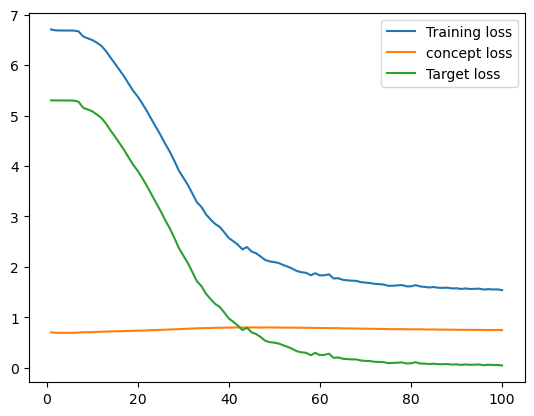

In [4]:
import numpy as np
import matplotlib.pyplot as plt
epochs_in_training = 100

training_loss = torch.tensor(training_loss, device="cpu")
concept_loss = torch.tensor(concept_loss, device="cpu")
target_loss = torch.tensor(target_loss, device="cpu")

training_loss = np.array(training_loss)
concept_loss = np.array(concept_loss)
target_loss = np.array(target_loss)

x_axis = np.arange(1,epochs_in_training+1,1)

plt.plot(x_axis, training_loss, label = "Training loss")
plt.plot(x_axis, concept_loss, label= "concept loss")
plt.plot(x_axis, target_loss, label="Target loss")
plt.legend()
plt.show()

----- SAVE MODEL_2_2 as PICKLE FILE --------

In [5]:
import pickle
with open('../saved_models/model_2_2.pkl', 'wb') as f:
    pickle.dump(model_2_2, f)
f.close()

------ DELETE ALL VARIABLES (OTHER THAN DATASET) AND CLEAR GPU CACHE-----------

In [20]:
del model_2_2, concept_loss, training_loss, target_loss
torch.cuda.empty_cache()

## MODEL: ONLY CONCEPT LOSS IS CONSIDERED ##
MODEL NAME: model_3_1

In [4]:
from source import models, train_model
import torch
from torch import nn

#device = "cuda" if torch.cuda.is_available() else "cpu"
device ='cpu'
model_3_1 = models.CBM(c_chanel=3, 
                   hidden_units=32, 
                   concepts=312, 
                   output_shape=200,
                   img_shape=32).to(device)

training_loss, concept_loss, target_loss = train_model.train_with_CUB(model=model_3_1,
                           epochs=100,
                           BATCH_SIZE=32,
                           X_train= X_train,
                           y_train= y_train,
                           device=device,
                           learning_rate=0.1,
                           consider_concept_loss=True,
                           consider_target_loss= False,
                           img_shape=32,
                           c_lambda=1.0)

Epoch 1: Training loss  0.70648, concept loss:  0.70648, target loss:  5.29932

Epoch 2: Training loss  0.69946, concept loss:  0.69946, target loss:  5.29894

Epoch 3: Training loss  0.69551, concept loss:  0.69551, target loss:  5.29888

Epoch 4: Training loss  0.69378, concept loss:  0.69378, target loss:  5.29879

Epoch 5: Training loss  0.69323, concept loss:  0.69323, target loss:  5.29878

Epoch 6: Training loss  0.69301, concept loss:  0.69301, target loss:  5.29877

Epoch 7: Training loss  0.69289, concept loss:  0.69289, target loss:  5.29877

Epoch 8: Training loss  0.69284, concept loss:  0.69284, target loss:  5.29880

Epoch 9: Training loss  0.69281, concept loss:  0.69281, target loss:  5.29879

Epoch 10: Training loss  0.69278, concept loss:  0.69278, target loss:  5.29879

Epoch 11: Training loss  0.69275, concept loss:  0.69275, target loss:  5.29884

Epoch 12: Training loss  0.69273, concept loss:  0.69273, target loss:  5.29881

Epoch 13: Training loss  0.69271, con

------------    PLOT THE LOSS CURVES FOR MODEL_3_1   -------------

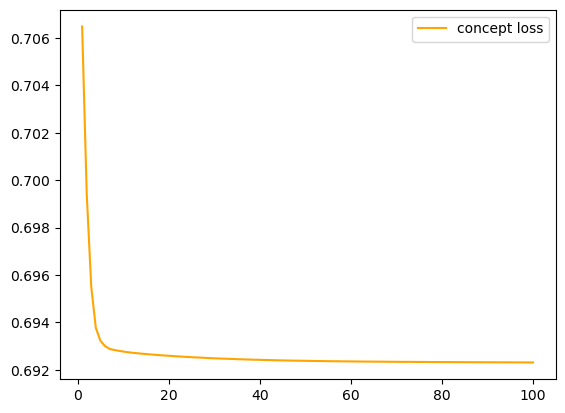

In [5]:
import numpy as np
import matplotlib.pyplot as plt
epochs_in_training = 100

#training_loss = torch.tensor(training_loss, device="cpu")
concept_loss = torch.tensor(concept_loss, device="cpu")
#target_loss = torch.tensor(target_loss, device="cpu")

#training_loss = np.array(training_loss)
concept_loss = np.array(concept_loss)
#target_loss = np.array(target_loss)

x_axis = np.arange(1,epochs_in_training+1,1)

#plt.plot(x_axis, training_loss, label = "Training loss")
plt.plot(x_axis, concept_loss, label= "concept loss", color ='orange')
#plt.plot(x_axis, target_loss, label="Target loss")
plt.legend()
plt.show()

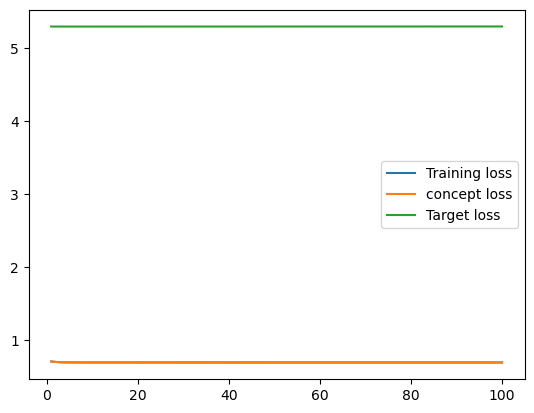

In [6]:
import numpy as np
import matplotlib.pyplot as plt
epochs_in_training = 100

training_loss = torch.tensor(training_loss, device="cpu")
concept_loss = torch.tensor(concept_loss, device="cpu")
target_loss = torch.tensor(target_loss, device="cpu")

training_loss = np.array(training_loss)
concept_loss = np.array(concept_loss)
target_loss = np.array(target_loss)

x_axis = np.arange(1,epochs_in_training+1,1)

plt.plot(x_axis, training_loss, label = "Training loss")
plt.plot(x_axis, concept_loss, label= "concept loss")
plt.plot(x_axis, target_loss, label="Target loss")
plt.legend()
plt.show()

----- SAVE MODEL_3_1 as PICKLE FILE --------

In [7]:
import pickle
with open('../saved_models/model_3_1.pkl', 'wb') as f:
    pickle.dump(model_3_1, f)
f.close()

------ DELETE ALL VARIABLES (OTHER THAN DATASET) AND CLEAR GPU CACHE-----------

In [8]:
del model_3_1, concept_loss, training_loss, target_loss
torch.cuda.empty_cache()

## MODEL: ONLY Target LOSS IS CONSIDERED ##
MODEL NAME: model_3_2

In [3]:
from source import models, train_model
import torch
from torch import nn

#device = "cuda" if torch.cuda.is_available() else "cpu"
device ='cpu'
model_3_2 = models.CBM(c_chanel=3, 
                   hidden_units=32, 
                   concepts=312, 
                   output_shape=200,
                   img_shape=32).to(device)

training_loss, concept_loss, target_loss = train_model.train_with_CUB(model=model_3_2,
                           epochs=100,
                           BATCH_SIZE=32,
                           X_train= X_train,
                           y_train= y_train,
                           device=device,
                           learning_rate=0.1,
                           consider_concept_loss=False,
                           consider_target_loss= True,
                           img_shape=32,
                           c_lambda=1.0)

c:\Users\DELL\anaconda3\envs\py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\ML_Projects\CBM\jupyter_notebooks\..\source\train_model.py:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  X_train = torch.tensor(X_list).to(device)


Epoch 1: Training loss  5.30213, concept loss:  0.71111, target loss:  5.30213

Epoch 2: Training loss  5.27887, concept loss:  0.73076, target loss:  5.27887

Epoch 3: Training loss  5.16359, concept loss:  0.77069, target loss:  5.16359

Epoch 4: Training loss  5.00066, concept loss:  0.79763, target loss:  5.00066

Epoch 5: Training loss  4.89812, concept loss:  0.80029, target loss:  4.89812

Epoch 6: Training loss  4.79776, concept loss:  0.81080, target loss:  4.79776

Epoch 7: Training loss  4.64350, concept loss:  0.83341, target loss:  4.64350

Epoch 8: Training loss  4.47141, concept loss:  0.84501, target loss:  4.47141

Epoch 9: Training loss  4.32000, concept loss:  0.85168, target loss:  4.32000

Epoch 10: Training loss  4.17750, concept loss:  0.85914, target loss:  4.17750

Epoch 11: Training loss  4.03043, concept loss:  0.86546, target loss:  4.03043

Epoch 12: Training loss  3.89418, concept loss:  0.86963, target loss:  3.89418

Epoch 13: Training loss  3.75394, con

----- SAVE MODEL_3_2 as PICKLE FILE --------

In [4]:
import pickle
with open('../saved_models/model_3_2.pkl', 'wb') as f:
    pickle.dump(model_3_2, f)
f.close()

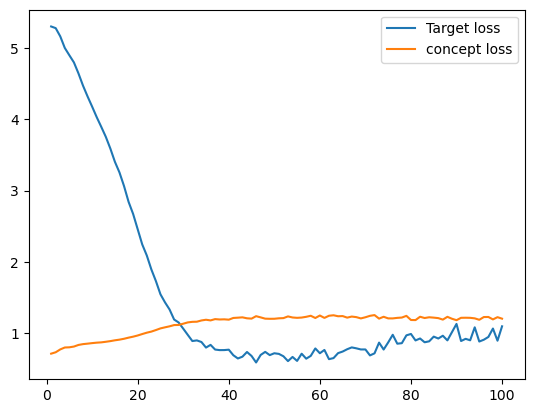

In [16]:
import numpy as np
import matplotlib.pyplot as plt
epochs_in_training = 100

training_loss = torch.tensor(training_loss, device="cpu")
concept_loss = torch.tensor(concept_loss, device="cpu")
target_loss = torch.tensor(target_loss, device="cpu")

training_loss = np.array(training_loss)
concept_loss = np.array(concept_loss)
target_loss = np.array(target_loss)

x_axis = np.arange(1,epochs_in_training+1,1)

#plt.plot(x_axis, training_loss, label = "Training loss")
plt.plot(x_axis, target_loss, label="Target loss")
plt.plot(x_axis, concept_loss, label= "concept loss")

plt.legend()
plt.show()

In [13]:
target_loss==training_loss

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

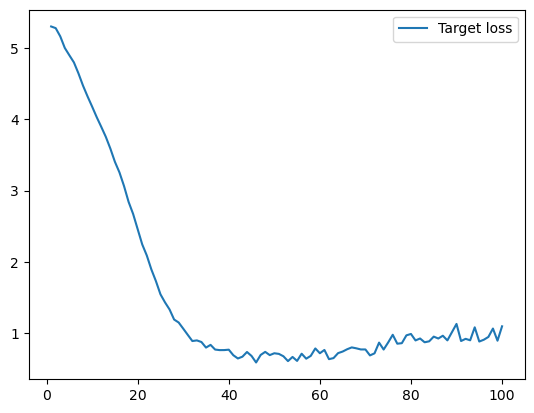

In [14]:
plt.plot(x_axis, target_loss, label="Target loss")


plt.legend()
plt.show()

In [1]:
import sys
sys.path.insert(0, "..")

LOAD THE IMAGE DIRECTORY, CONCEPT TAGS AND CLASS LABELS, (RUN ANY OF THE FOLLOWINF TWO CELLS)

In [ ]:
# from source import data_processing, train_model

# dir ="../dataset/CUB_200_2011/"   #-----directory of the CUB dataset

# X_train, X_test, y_train, y_test = data_processing.extract_data_path_concept_and_label(dir)  #-----data_processing function is modified not to split the validation set for now
# print(f"Train data: {len(X_train)} and Test Data: {len(X_test)}")

## LOAD THE TRAINING DATA ##

In [2]:
import pickle
with open('../dataset/cub_pickles/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
f.close()

with open('../dataset/cub_pickles/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
f.close()


## MODEL : concept los=10*Concept loss##

In [3]:
from source import models, train_model
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
#device ='cpu'
model_10_1 = models.CBM(c_chanel=3, 
                   hidden_units=32, 
                   concepts=312, 
                   output_shape=200,
                   img_shape=32).to(device)

training_loss, concept_loss, target_loss = train_model.train_with_CUB(model=model_10_1,
                           epochs=100,
                           BATCH_SIZE=32,
                           X_train= X_train,
                           y_train= y_train,
                           device=device,
                           learning_rate=0.1,
                           consider_concept_loss=True,
                           consider_target_loss= True,
                           img_shape=32,
                           c_lambda=10.0)

c:\Users\DELL\anaconda3\envs\py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\ML_Projects\CBM\jupyter_notebooks\..\source\train_model.py:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  X_train = torch.tensor(X_list).to(device)


Epoch 1: Training loss  12.25282, concept loss:  0.69522, target loss:  5.30064

Epoch 2: Training loss  12.22640, concept loss:  0.69259, target loss:  5.30046

Epoch 3: Training loss  12.22450, concept loss:  0.69242, target loss:  5.30027

Epoch 4: Training loss  12.22038, concept loss:  0.69235, target loss:  5.29688

Epoch 5: Training loss  12.18441, concept loss:  0.69269, target loss:  5.25752

Epoch 6: Training loss  12.08514, concept loss:  0.69306, target loss:  5.15457

Epoch 7: Training loss  12.04982, concept loss:  0.69293, target loss:  5.12055

Epoch 8: Training loss  12.03031, concept loss:  0.69288, target loss:  5.10154

Epoch 9: Training loss  12.01008, concept loss:  0.69284, target loss:  5.08168

Epoch 10: Training loss  11.99383, concept loss:  0.69286, target loss:  5.06528

Epoch 11: Training loss  11.97183, concept loss:  0.69291, target loss:  5.04275

Epoch 12: Training loss  11.94821, concept loss:  0.69304, target loss:  5.01777

Epoch 13: Training loss  

------------    PLOT THE LOSS CURVES FOR MODEL_1_1   -------------

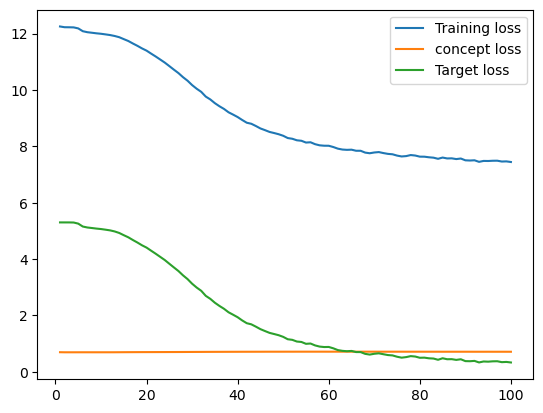

In [4]:
import numpy as np
import matplotlib.pyplot as plt
epochs_in_training = 100

training_loss = torch.tensor(training_loss, device="cpu")
concept_loss = torch.tensor(concept_loss, device="cpu")
target_loss = torch.tensor(target_loss, device="cpu")

training_loss = np.array(training_loss)
concept_loss = np.array(concept_loss)
target_loss = np.array(target_loss)

x_axis = np.arange(1,epochs_in_training+1,1)

plt.plot(x_axis, training_loss, label = "Training loss")
plt.plot(x_axis, concept_loss, label= "concept loss")
plt.plot(x_axis, target_loss, label="Target loss")
plt.legend()
plt.show()

--------- SAVE MODEL_1_1 AS PICKLE FILE ---------

In [ ]:
import pickle
with open('../saved_models/model_10_1.pkl', 'wb') as f:
    pickle.dump(model_10_1, f)
f.close()

------ DELETE ALL VARIABLES (OTHER THAN DATASET) AND CLEAR GPU CACHE-----------

In [ ]:
del model_10_1, concept_loss, training_loss, target_loss
torch.cuda.empty_cache()

In [3]:
import sys
sys.path.insert(0, "..")

## LOAD THE TRAINING DATA ##

In [4]:
import pickle
with open('../dataset/cub_pickles/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
f.close()

with open('../dataset/cub_pickles/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
f.close()


## MODEL : concept los=10*Concept loss##

In [5]:
from source import models, train_model
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
#device ='cpu'
model_100_1 = models.CBM(c_chanel=3, 
                   hidden_units=32, 
                   concepts=312, 
                   output_shape=200,
                   img_shape=32).to(device)

training_loss, concept_loss, target_loss = train_model.train_with_CUB(model=model_100_1,
                           epochs=100,
                           BATCH_SIZE=32,
                           X_train= X_train,
                           y_train= y_train,
                           device=device,
                           learning_rate=0.1,
                           consider_concept_loss=True,
                           consider_target_loss= True,
                           img_shape=32,
                           c_lambda=100.0)

c:\Users\DELL\anaconda3\envs\py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\ML_Projects\CBM\jupyter_notebooks\..\source\train_model.py:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  X_train = torch.tensor(X_list).to(device)


Epoch 1: Training loss  74.67001, concept loss:  69.36984, target loss:  5.30015

Epoch 2: Training loss  74.60893, concept loss:  69.30904, target loss:  5.29992

Epoch 3: Training loss  74.60852, concept loss:  69.30892, target loss:  5.29964

Epoch 4: Training loss  74.60795, concept loss:  69.30858, target loss:  5.29938

Epoch 5: Training loss  74.60774, concept loss:  69.30850, target loss:  5.29926

Epoch 6: Training loss  74.60640, concept loss:  69.30739, target loss:  5.29901

Epoch 7: Training loss  74.60421, concept loss:  69.30556, target loss:  5.29861

Epoch 8: Training loss  74.60205, concept loss:  69.30412, target loss:  5.29787

Epoch 9: Training loss  74.59334, concept loss:  69.29915, target loss:  5.29420

Epoch 10: Training loss  74.57841, concept loss:  69.29712, target loss:  5.28129

Epoch 11: Training loss  74.54269, concept loss:  69.30343, target loss:  5.23926

Epoch 12: Training loss  74.48681, concept loss:  69.31580, target loss:  5.17102

Epoch 13: Tra

------------    PLOT THE LOSS CURVES FOR MODEL_1_1   -------------

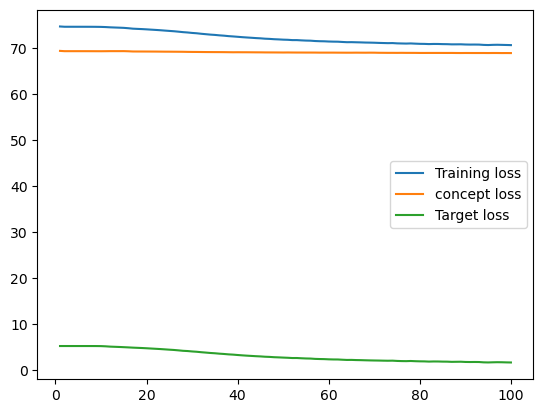

In [6]:
import numpy as np
import matplotlib.pyplot as plt
epochs_in_training = 100

training_loss = torch.tensor(training_loss, device="cpu")
concept_loss = torch.tensor(concept_loss, device="cpu")
target_loss = torch.tensor(target_loss, device="cpu")

training_loss = np.array(training_loss)
concept_loss = np.array(concept_loss)
target_loss = np.array(target_loss)

x_axis = np.arange(1,epochs_in_training+1,1)

plt.plot(x_axis, training_loss, label = "Training loss")
plt.plot(x_axis, concept_loss, label= "concept loss")
plt.plot(x_axis, target_loss, label="Target loss")
plt.legend()
plt.show()

--------- SAVE MODEL_1_1 AS PICKLE FILE ---------

In [7]:
import pickle
with open('../saved_models/model_100_1.pkl', 'wb') as f:
    pickle.dump(model_100_1, f)
f.close()

------ DELETE ALL VARIABLES (OTHER THAN DATASET) AND CLEAR GPU CACHE-----------

In [9]:
del model_100_1, concept_loss, training_loss, target_loss
torch.cuda.empty_cache()

NameError: name 'model_100_1' is not defined

In [1]:
import sys
sys.path.insert(0, "..")

## LOAD THE TRAINING DATA ##

In [2]:
import pickle
with open('../dataset/cub_pickles/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
f.close()

with open('../dataset/cub_pickles/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
f.close()


## MODEL : concept los=10*Concept loss##

In [3]:
from source import models, train_model
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
#device ='cpu'
model_8_1 = models.CBM(c_chanel=3, 
                   hidden_units=32, 
                   concepts=312, 
                   output_shape=200,
                   img_shape=32).to(device)

training_loss, concept_loss, target_loss = train_model.train_with_CUB(model=model_8_1,
                           epochs=100,
                           BATCH_SIZE=32,
                           X_train= X_train,
                           y_train= y_train,
                           device=device,
                           learning_rate=0.1,
                           consider_concept_loss=True,
                           consider_target_loss= True,
                           img_shape=32,
                           c_lambda=8.0)

c:\Users\DELL\anaconda3\envs\py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\ML_Projects\CBM\jupyter_notebooks\..\source\train_model.py:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  X_train = torch.tensor(X_list).to(device)


Epoch 1: Training loss  10.87237, concept loss:  5.57170, target loss:  5.30067

Epoch 2: Training loss  10.84180, concept loss:  5.54167, target loss:  5.30013

Epoch 3: Training loss  10.84083, concept loss:  5.54077, target loss:  5.30005

Epoch 4: Training loss  10.84024, concept loss:  5.54020, target loss:  5.30004

Epoch 5: Training loss  10.83987, concept loss:  5.53982, target loss:  5.30005

Epoch 6: Training loss  10.83966, concept loss:  5.53957, target loss:  5.30010

Epoch 7: Training loss  10.83947, concept loss:  5.53940, target loss:  5.30007

Epoch 8: Training loss  10.83944, concept loss:  5.53931, target loss:  5.30013

Epoch 9: Training loss  10.83938, concept loss:  5.53923, target loss:  5.30014

Epoch 10: Training loss  10.83931, concept loss:  5.53917, target loss:  5.30014

Epoch 11: Training loss  10.83910, concept loss:  5.53913, target loss:  5.29997

Epoch 12: Training loss  10.83876, concept loss:  5.53912, target loss:  5.29964

Epoch 13: Training loss  

------------    PLOT THE LOSS CURVES FOR MODEL_1_1   -------------

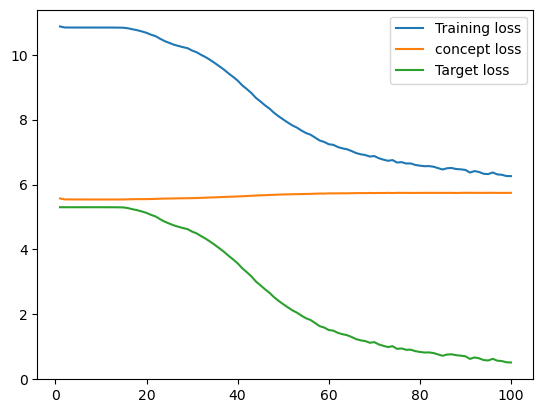

In [4]:
import numpy as np
import matplotlib.pyplot as plt
epochs_in_training = 100

training_loss = torch.tensor(training_loss, device="cpu")
concept_loss = torch.tensor(concept_loss, device="cpu")
target_loss = torch.tensor(target_loss, device="cpu")

training_loss = np.array(training_loss)
concept_loss = np.array(concept_loss)
target_loss = np.array(target_loss)

x_axis = np.arange(1,epochs_in_training+1,1)

plt.plot(x_axis, training_loss, label = "Training loss")
plt.plot(x_axis, concept_loss, label= "concept loss")
plt.plot(x_axis, target_loss, label="Target loss")
plt.legend()
plt.show()

--------- SAVE MODEL_1_1 AS PICKLE FILE ---------

In [5]:
import pickle
with open('../saved_models/model_8_1.pkl', 'wb') as f:
    pickle.dump(model_8_1, f)
f.close()

------ DELETE ALL VARIABLES (OTHER THAN DATASET) AND CLEAR GPU CACHE-----------

In [6]:
del model_8_1, concept_loss, training_loss, target_loss
torch.cuda.empty_cache()

In [1]:
import sys
sys.path.insert(0, "..")

## LOAD THE TRAINING DATA ##

In [2]:
import pickle
with open('../dataset/cub_pickles/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
f.close()

with open('../dataset/cub_pickles/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
f.close()


## MODEL : concept los=10*Concept loss##

In [3]:
from source import models, train_model
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
#device ='cpu'
model_16_1 = models.CBM(c_chanel=3, 
                   hidden_units=32, 
                   concepts=312, 
                   output_shape=200,
                   img_shape=32).to(device)

training_loss, concept_loss, target_loss = train_model.train_with_CUB(model=model_16_1,
                           epochs=100,
                           BATCH_SIZE=32,
                           X_train= X_train,
                           y_train= y_train,
                           device=device,
                           learning_rate=0.1,
                           consider_concept_loss=True,
                           consider_target_loss= True,
                           img_shape=32,
                           c_lambda=16.0)

c:\Users\DELL\anaconda3\envs\py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\ML_Projects\CBM\jupyter_notebooks\..\source\train_model.py:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  X_train = torch.tensor(X_list).to(device)


Epoch 1: Training loss  16.41167, concept loss:  11.11103, target loss:  5.30064

Epoch 2: Training loss  16.38143, concept loss:  11.08072, target loss:  5.30071

Epoch 3: Training loss  16.37960, concept loss:  11.07864, target loss:  5.30095

Epoch 4: Training loss  16.37860, concept loss:  11.07787, target loss:  5.30074

Epoch 5: Training loss  16.37700, concept loss:  11.07752, target loss:  5.29948

Epoch 6: Training loss  16.36943, concept loss:  11.07800, target loss:  5.29143

Epoch 7: Training loss  16.32452, concept loss:  11.08337, target loss:  5.24114

Epoch 8: Training loss  16.23610, concept loss:  11.08786, target loss:  5.14825

Epoch 9: Training loss  16.20418, concept loss:  11.08730, target loss:  5.11688

Epoch 10: Training loss  16.18242, concept loss:  11.08718, target loss:  5.09522

Epoch 11: Training loss  16.15922, concept loss:  11.08732, target loss:  5.07189

Epoch 12: Training loss  16.13815, concept loss:  11.08837, target loss:  5.04978

Epoch 13: Tra

------------    PLOT THE LOSS CURVES FOR MODEL_1_1   -------------

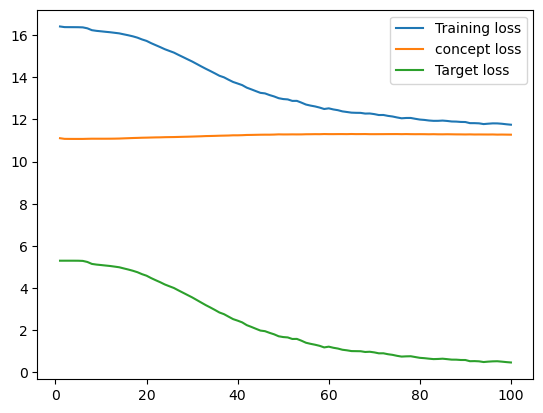

In [4]:
import numpy as np
import matplotlib.pyplot as plt
epochs_in_training = 100

training_loss = torch.tensor(training_loss, device="cpu")
concept_loss = torch.tensor(concept_loss, device="cpu")
target_loss = torch.tensor(target_loss, device="cpu")

training_loss = np.array(training_loss)
concept_loss = np.array(concept_loss)
target_loss = np.array(target_loss)

x_axis = np.arange(1,epochs_in_training+1,1)

plt.plot(x_axis, training_loss, label = "Training loss")
plt.plot(x_axis, concept_loss, label= "concept loss")
plt.plot(x_axis, target_loss, label="Target loss")
plt.legend()
plt.show()

--------- SAVE MODEL_1_1 AS PICKLE FILE ---------

In [5]:
import pickle
with open('../saved_models/model_8_1.pkl', 'wb') as f:
    pickle.dump(model_16_1, f)
f.close()

------ DELETE ALL VARIABLES (OTHER THAN DATASET) AND CLEAR GPU CACHE-----------

In [6]:
del model_16_1, concept_loss, training_loss, target_loss
torch.cuda.empty_cache()